## QQQ ETF and Central Tendency
By J. "Murph" Whitaker
***

### Introduction
The purpose of this notebook is to study historical maximal movement of QQQ (NASDAQ-100 ETF) above and below the 50-day moving average. The 50-day line, a measure of central tendency, is a key technical tool favored by professional and retail speculators in making buy and sell decisions, e.g., exiting a long position at some point above the 50-day line, entering a long positon at some point below the line, or establishing a position at the line. Understanding how far prices move away from the mean may give the speculator reasonable expectations on where prices may revert to the mean.

> Reversion to the mean, also called regression to the mean, is the statistical phenomenon stating that the greater the deviation of a random variate from its mean, the greater the probability that the next measured variate will deviate less far. In other words, an extreme event is likely to be followed by a less extreme event. *[-Mathworld](http://mathworld.wolfram.com/ReversiontotheMean.html)*

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import iexfinance
from iexfinance import StockReader

### Methodology
This study uses time series closing price data of the NASDAQ-100 ETF, stock symbol QQQ, from 9/7/2013 to 9/7/2018. Calculation of the 50-day moving average and ratio of closing price distance away are accomplished in this notebook. Frequency of maximum and minimum observations: Year, month, and grand total.  Analysis of frequency was achieved using an excel pivot table with such data converted to a csv file for use in this notebook.   

Query historical data

In [2]:
start = datetime.datetime(2013, 9, 7)
end = datetime.datetime(2018, 9, 7)
from iexfinance import get_historical_data

Input selected stock symbol, in this case, QQQ

In [3]:
a = get_historical_data(input('Enter stock symbol: '), start, end, output_format = 'pandas')
a.tail()

Enter stock symbol: QQQ


,open,high,low,close,volume
date,,,,,
2018-08-31,186.18,187.18,185.98,186.65,28653248
2018-09-04,186.10,186.40,184.85,185.85,29063537
2018-09-05,185.55,185.55,182.82,183.45,42623326
2018-09-06,183.54,183.75,180.58,181.81,46091403
2018-09-07,180.53,182.67,180.44,181.11,46629495


Compute 50-day moving average

In [4]:
a_50d = a['close'].rolling(50).mean()

Compute ratio of closing prices to 50-day line to determine distance and add new column to dataset

In [5]:
a_dist50d = a['close'] / a_50d - 1
a['a_dist50d'] = a_dist50d
a.tail()

,open,high,low,close,volume,a_dist50d
date,,,,,,
2018-08-31,186.18,187.18,185.98,186.65,28653248,0.043820
2018-09-04,186.10,186.40,184.85,185.85,29063537,0.038123
2018-09-05,185.55,185.55,182.82,183.45,42623326,0.023336
2018-09-06,183.54,183.75,180.58,181.81,46091403,0.013087
2018-09-07,180.53,182.67,180.44,181.11,46629495,0.007908


Convert dataframe to csv file for further analysis in excel to isolate maximum and minimum values by year and month

In [6]:
a_dist50d.to_csv('a_dist50d.csv')

Analysis complete, convert renamed csv file back to dataframe

In [7]:
a_dist50d_tbl = pd.read_csv('a_dist50d_tbl.csv')

### Results

Plot closing price data

A close look at the line chart of QQQ closing prices shows where prices have moved farthest away from the 50-day moving average, both above and below the line.

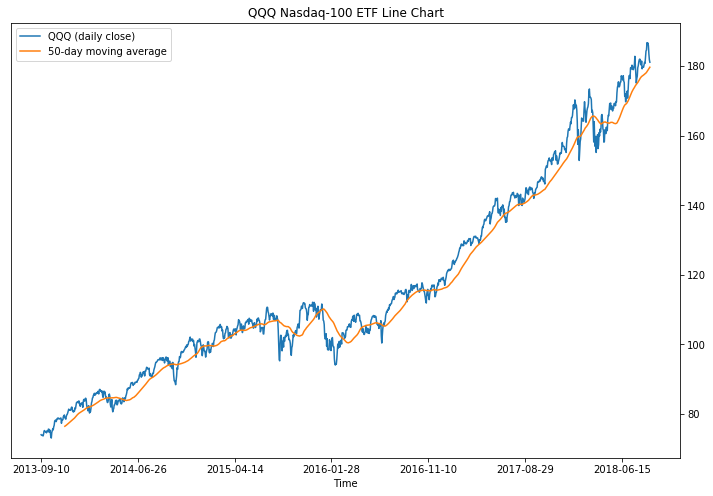

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.yaxis.tick_right()
a['close'].plot(label = 'QQQ (daily close)',figsize = (12,8),title = 'QQQ Nasdaq-100 ETF Line Chart')
a_50d.plot(label = '50-day moving average')
plt.xlabel('Time')
plt.legend()

Plot ratio of distance

The ratio line chart depicts the ratio of the close to the 50-day line for all daily prices in the sample and shows both extreme movements and what might be considered normal movements. The chart indicates maximum movement above the line at greater than 7.5% and below the line at -10% on two occasions. 

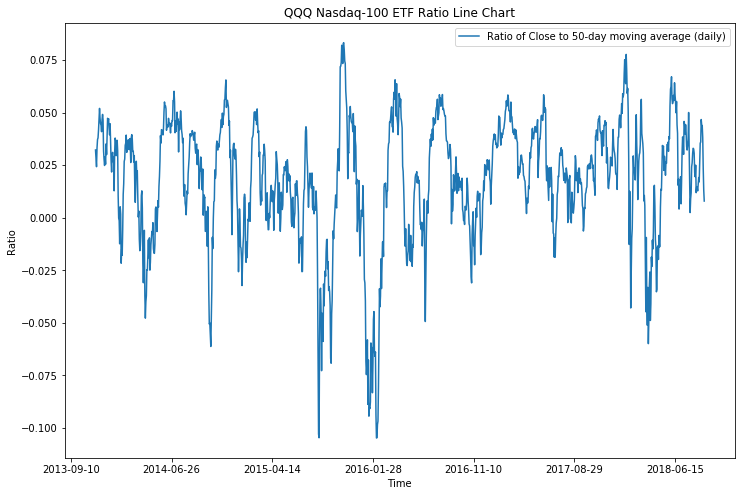

In [9]:
a_dist50d.plot(label = 'Ratio of Close to 50-day moving average (daily)',
             figsize = (12,8),title = 'QQQ Nasdaq-100 ETF Ratio Line Chart')
plt.ylabel('Ratio')
plt.xlabel('Time')
plt.legend()

Find maximum and minimum distance from 50-day line along with associated dates

During the time period studied, the QQQ ETF moved a maximum 8.3% above central tendency on 11/03/2015 and 10.5% below on 02-08-2016. Data indicates downside movement was more extreme than upside.

In [10]:
np.max(a_dist50d), np.min(a_dist50d)

(0.083206246600529, -0.1047657577839406)

In [11]:
a_dist50d.idxmax(), a_dist50d.idxmin()

('2015-11-03', '2016-02-08')

Plot distribution of ratios

The distribution plot displays frequency of price movement. As noted above, .083 and -.105 lie at the tails of the plot. The table of descriptive statistics reveals the mean at 1.75%, median at 2.1% and half of all price movement residing in the .3% to 3.9% range indicating that price spends more time above the line than below in the sample. 

Text(0.5,0,'Ratio')

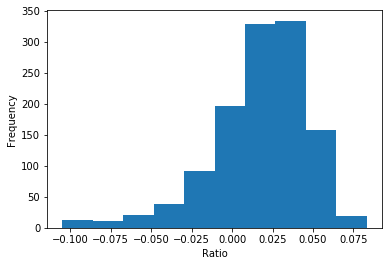

In [12]:
a_dist50d.plot.hist()
plt.xlabel('Ratio')

In [13]:
a_dist50d.describe()

count    1210.000000
mean        0.017522
std         0.029593
min        -0.104766
25%         0.003114
50%         0.021264
75%         0.039145
max         0.083206
Name: close, dtype: float64

Plot box plot

The box plot below indicates a range of movement of about 13%, excluding outliers. If we include outliers, then total range of movement is 18.8%. Small circles are depicted as outliers as a result of the [1.5 times the IQR rule](https://www.purplemath.com/modules/boxwhisk3.htm) because those values are considered to be too far away from the central cluster of points in the sample.

The speculator will notice that an equivalent number of values above the median are less dispersed than the same number of values below the median highlighting the usually quick and wider movements to the downside, i.e., climbing the proverbial "wall of worry" to the upside contrasted with flushes to the downside. 

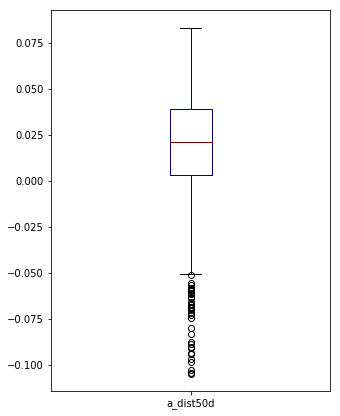

In [14]:
a['a_dist50d'].plot(kind = 'box', figsize = (5,7), colormap = 'jet')

Plot two box plots

The box plots below display exclusively maximum and minimum values by month during the sample period with the ratio of closes to the 50-day line depicted on the y-axis. Note the negative data points for max movements and the positive data points for min movements: price traded below the 50-day line during the entire monthly observation, hence the negative max value; during monthly observations where price traded above the 50-day line we can see positive min values.  

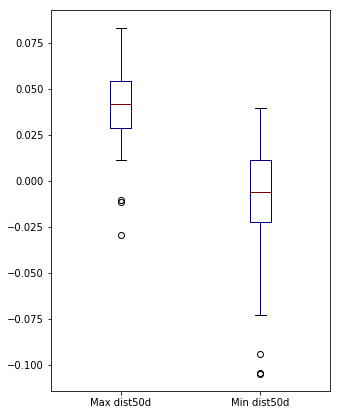

In [15]:
a_dist50d_tbl[['Max dist50d', 'Min dist50d']].plot.box(figsize = (5, 7), colormap = 'jet')

Jan 2016 and Jan 2018 are examples of prices trading above and below the line for the entire month resulting in positive min and negative max values as depicted in the box plot above.

In [16]:
a_dist50d_tbl[:10] 

,Month,Year,Max dist50d,Min dist50d
0,Jan,2014,0.037866,-0.012421
1,Jan,2015,0.011176,-0.032263
2,Jan,2016,-0.029317,-0.094365
3,Jan,2017,0.048350,0.015048
4,Jan,2018,0.077633,0.029798
5,Feb,2014,0.039269,-0.021650
6,Feb,2015,0.050341,-0.010229
7,Feb,2016,-0.011342,-0.104766
8,Feb,2017,0.058371,0.037902
9,Feb,2018,0.050556,-0.042938


Maximum distance above the 50-day line by year

In [17]:
a_dist50d_tbl.groupby('Year')['Max dist50d'].max() 

Year
2013    0.051967
2014    0.065498
2015    0.083206
2016    0.065573
2017    0.058427
2018    0.077633
Name: Max dist50d, dtype: float64

Minimum or lowest distance below the 50-day line by year

In [18]:
a_dist50d_tbl.groupby('Year')['Min dist50d'].min()

Year
2013    0.024241
2014   -0.061229
2015   -0.104645
2016   -0.104766
2017   -0.018764
2018   -0.059895
Name: Min dist50d, dtype: float64

### Summary and Discussion

The goal of this study was to compute and indentify how far the QQQ, NASDAQ-100 ETF, traded above or below the 50-day moving average based on closing prices during the 2013 to 2018 period. The maximum distance above the line was 8.3% and the minimum value or greatest distance below the line was 10.5%, on 11/03/2015 and 02-08-2016, respectively.

75% of all closing prices during the period traded above the 50-day line from .3% to a maximum of 8.3%. 25% percent of the time prices closed between .3% above the line and 10.5% below the line. As of the 9/7/2018 close, QQQ max above the line was 3.8% with a minimum of .8%.

Limitations to this study include number of observations. Further study may include historical data going back ten years or more. Questions for further study include: At what ratio of close to the 50-day line do prices mean revert or consolidate? What are the most probable ratios where prices may revert to the mean? When reverting to the mean how often do prices go through the 50-day line? A study of the ratios at the peaks and valleys. 